In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('c:\Users\Kishore\Desktop\Datasets\Edata.csv')

In [3]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
dataset.shape

(541909, 8)

In [5]:
X=dataset.iloc[:,[3,5]].values

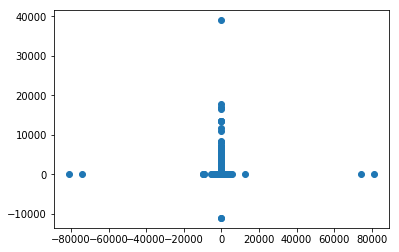

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[30846411619.78326,
 18798329694.036751,
 6756267117.561224,
 3823754014.8892374,
 2890756714.1898417,
 2359572128.8189206,
 1942876320.3452568,
 1560996301.3066297,
 1337632879.6959183,
 1098154792.6878841]

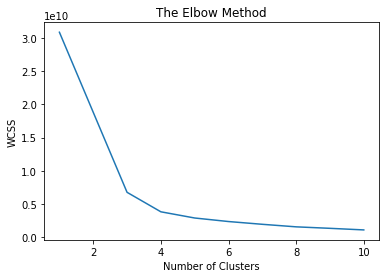

In [10]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
k = 4

In [12]:
kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)


In [13]:
y_kmeans=kmeans.fit_predict(X)

In [14]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
kmeans.cluster_centers_

array([[  9.55291267e+00,   4.05473266e+00],
       [ -7.76050000e+04,   1.56000000e+00],
       [  7.76050000e+04,   1.56000000e+00],
       [ -8.06451613e-01,   9.73043645e+03]])

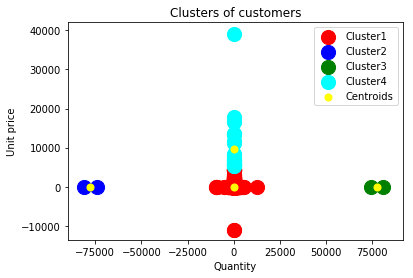

In [16]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=200,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=200,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=200,c='cyan',label='Cluster4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('Unit price')
plt.legend()
plt.show()